In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans
from PIL import Image

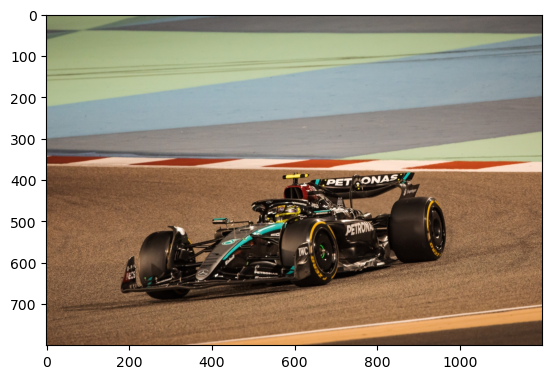

In [2]:
# Load the image
# image = cv2.imread('lww15.jpg', 0)
image = mpimg.imread("lww15.jpg")
plt.imshow(image)
plt.show()


In [3]:
# Convert to numpy array and flatten
data = image.reshape(-1, 3)

def kmeans_pic (data, clusster_no):
    # Apply k-means
    kmeans = KMeans(n_clusters=clusster_no)
    labels = kmeans.fit_predict(data)
    

    # Reshape the labels back to the original image dimensions
    labels = labels.reshape(image.shape[:2])

    # Quantize the image using the centroids
    centroids = kmeans.cluster_centers_
    quantized_image = centroids[labels]

    # Convert back to an image
    quantized_image = quantized_image.reshape(image.shape)
    quantized_image = np.uint8(quantized_image)

    # Save the result
    plt.imshow(quantized_image)
    return  quantized_image

d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


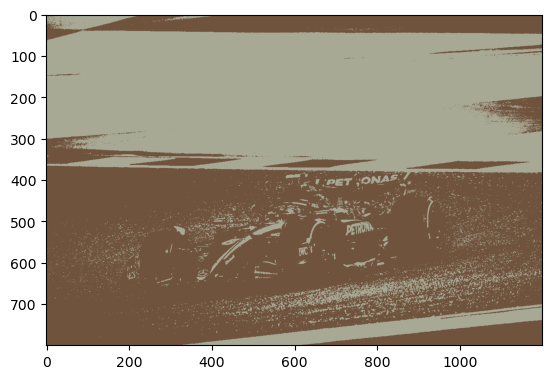

In [4]:
two_cluster = kmeans_pic(data=data, clusster_no=2)

d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


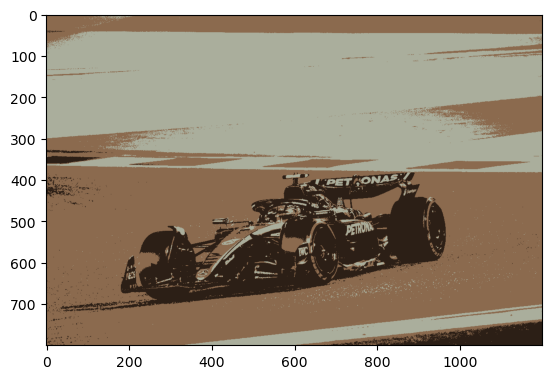

In [5]:
three_cluster=kmeans_pic(data=data, clusster_no=3)

d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


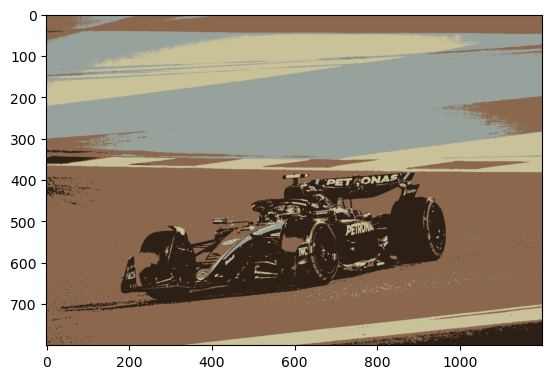

In [6]:
four_cluster=kmeans_pic(data=data, clusster_no=4)

d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


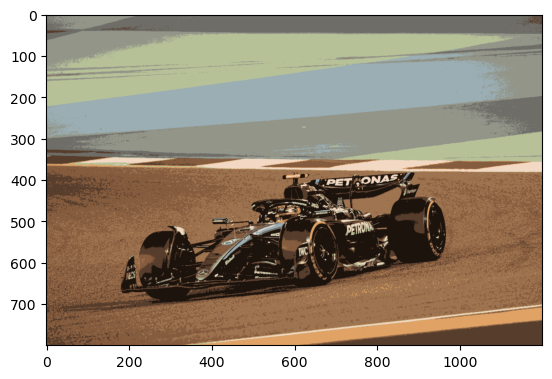

In [7]:
ten = kmeans_pic(data=data, clusster_no=10)

In [8]:
dif = ten - two_cluster
print(dif)

[[[254  26  43]
  [235 236 244]
  [235 236 244]
  ...
  [231 234 239]
  [231 234 239]
  [231 234 239]]

 [[254  26  43]
  [254  26  43]
  [254  26  43]
  ...
  [231 234 239]
  [254  26  43]
  [254  26  43]]

 [[198 196 211]
  [254  26  43]
  [198 196 211]
  ...
  [231 234 239]
  [231 234 239]
  [254  26  43]]

 ...

 [[ 22   9   1]
  [ 22   9   1]
  [ 22   9   1]
  ...
  [231 234 239]
  [231 234 239]
  [231 234 239]]

 [[ 22   9   1]
  [231 234 239]
  [231 234 239]
  ...
  [231 234 239]
  [231 234 239]
  [231 234 239]]

 [[231 234 239]
  [ 22   9   1]
  [231 234 239]
  ...
  [231 234 239]
  [231 234 239]
  [231 234 239]]]


In [9]:
def imagepartition(image_path, tile_size):

    img = Image.open(image_path)
    image = mpimg.imread(image_path)
    height, width, dim = image.shape
    print(width,height)
    for i in range(0, height, tile_size):
        for j in range(0, width, tile_size):
            box = (j, i, j + tile_size, i + tile_size)
            tile = image.crop(box)
            data = tile.reshape(-1, 3)
            v = kmeans_pic(data, 4)

In [10]:
imagepartition(image_path="D:\git ex\Data_Mining_and_Data_Analytics\photo segmentation\lww15.jpg", tile_size=100)

1200 800
<PIL.Image.Image image mode=RGB size=100x100 at 0x13B3E900590>


ValueError: cannot resize this array: it does not own its data